In [ ]:
from rdkit import Chem

In [ ]:
from rdkit import Chem

def get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts: str, 
                                           radius: int, 
                                           reactive_atom_indices: list) -> str:
    """
    Extract the chemical environment around multiple reactive atoms at a specified bond radius.
    """
    substrate_mol = Chem.MolFromSmarts(atom_mapped_substrate_smarts)
    if substrate_mol is None:
        raise ValueError("Invalid SMARTS string provided.")
    
    # Initialize a set to collect all atom indices in the environment
    atom_indices = set()

    # Loop through each reactive atom and find its environment
    for atom_idx in reactive_atom_indices:
        reaction_environment = Chem.FindAtomEnvironmentOfRadiusN(
            mol=substrate_mol, radius=radius, rootedAtAtom=atom_idx
        )
        
        # Collect atom indices from the bonds in this environment
        for bond_idx in reaction_environment:
            bond = substrate_mol.GetBondWithIdx(bond_idx)
            atom_indices.add(bond.GetBeginAtomIdx())
            atom_indices.add(bond.GetEndAtomIdx())

    # Generate the SMARTS string for the combined environment
    env_smarts = Chem.MolFragmentToSmarts(
        substrate_mol, 
        atomsToUse=list(atom_indices)
    )
    
    return env_smarts

In [ ]:
atom_mapped_substrate_smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
reactive_atom_indices = [2, 3, 4]  # Atoms undergoing the bond transformation
radius = 1

env_smarts = get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts, radius, reactive_atom_indices)
print(env_smarts)


In [ ]:
Chem.MolFromSmarts('[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1')

In [ ]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]')

In [ ]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]([c&H1:6])[c&H1:10]')

In [ ]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]([c&H1:6][c&H1:7])[c&H1:10][c&H1:9]')

In [ ]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1')

In [ ]:
NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1.O=C1CCNC(=O)N1>>NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.O=c1cc[nH]c(=O)[nH]1.[H+]


In [ ]:
Chem.MolFromSmarts('O=C1CCNC(=O)N1')

In [ ]:
Chem.MolFromSmarts('O=c1cc[nH]c(=O)[nH]1')

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from copy import deepcopy


def increase_resolution(mol, substructure, size=(400, 200), kekulize=True):
    mol = deepcopy(mol)
    substructure = deepcopy(substructure)
    rdDepictor.Compute2DCoords(mol)
    if kekulize:
        Chem.Kekulize(mol) # Localize the benzene ring bonds
        
    drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    
    # highlightAtoms expects only one tuple, not tuple of tuples. So it needs to be merged into a single tuple
    matches = sum(mol.GetSubstructMatches(substructure), ())
    drawer.DrawMolecule(mol, highlightAtoms=matches)
    
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')


mol = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
SVG(increase_resolution(mol, substructure, kekulize=True))

In [ ]:
from rdkit import Chem

def get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts: str, 
                                           radius: int, 
                                           reactive_atom_indices: list) -> str:
    """
    Extract the chemical environment around multiple reactive atoms at a specified bond radius.
    """
    substrate_mol = Chem.MolFromSmarts(atom_mapped_substrate_smarts)
    if substrate_mol is None:
        raise ValueError("Invalid SMARTS string provided.")
    
    # Initialize a set to collect all atom indices in the environment
    atom_indices = set()

    # Loop through each reactive atom and find its environment
    for atom_idx in reactive_atom_indices:
        reaction_environment = Chem.FindAtomEnvironmentOfRadiusN(
            mol=substrate_mol, radius=radius, rootedAtAtom=atom_idx
        )
        reaction_environment = Chem.PathToSubmol(substrate_mol,
                                                 reaction_environment)
        
        # Collect atom indices from the bonds in this environment
        for bond_idx in reaction_environment:
            bond = substrate_mol.GetBondWithIdx(bond_idx)
            atom_indices.add(bond.GetBeginAtomIdx())
            atom_indices.add(bond.GetEndAtomIdx())

    # Generate the SMARTS string for the combined environment
    env_smarts = Chem.MolFragmentToSmarts(
        substrate_mol, 
        atomsToUse=list(atom_indices)
    )
    
    return env_smarts

In [ ]:
atom_mapped_substrate_smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
reactive_atom_indices = [1, 2]  # Atoms undergoing the bond transformation
radius = 4

env_smarts = get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts, radius, reactive_atom_indices)
print(env_smarts)


In [ ]:
env = Chem.FindAtomEnvironmentOfRadiusN(mol = Chem.MolFromSmarts('[CH3:1][CH2:2][OH:3]'), 
                                  radius = 2, 
                                  rootedAtAtom = 2)

In [ ]:
Chem.PathToSubmol(Chem.MolFromSmarts('[CH3:1][CH2:2][OH:3]'),
                  env)

In [ ]:
substrate_mol = Chem.MolFromSmarts('[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1')
reaction_environment = Chem.FindAtomEnvironmentOfRadiusN(substrate_mol,
                                                        radius = 1,
                                                        rootedAtAtom = 3)

In [ ]:
for bond_idx in reaction_environment:
    bond = substrate_mol.GetBondWithIdx(bond_idx)
    print(bond.GetBeginAtomIdx())

In [50]:
from rdkit import Chem

In [51]:
mol = Chem.MolFromSmarts('[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1')

In [ ]:
mol

In [ ]:
env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius = 1, rootedAtAtom = 5)

In [ ]:
submol = Chem.PathToSubmol(mol, env)

In [ ]:
submol

In [ ]:
from rdkit import Chem

# Create a molecule from the SMARTS string
smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
mol = Chem.MolFromSmarts(smarts)

# Verify atom map numbers
print("Atom map numbers:")
for atom in mol.GetAtoms():
    print(f"Atom index: {atom.GetIdx()}, Atom map number: {atom.GetAtomMapNum()}")

# Find the atom index for atom map number 5
rooted_atom_map = 5
rooted_atom_index = None
for atom in mol.GetAtoms():
    if atom.GetAtomMapNum() == rooted_atom_map:
        rooted_atom_index = atom.GetIdx()
        break

if rooted_atom_index is None:
    raise ValueError(f"Atom with map number {rooted_atom_map} not found!")

# Use FindAtomEnvironmentOfRadiusN with the rooted atom index
radius = 1
env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, rootedAtAtom=rooted_atom_index)

# Create a sub-molecule from the environment
submol = Chem.PathToSubmol(mol, env)

# Display the sub-molecule
print("Sub-molecule:")
for atom in submol.GetAtoms():
    print(f"Atom index: {atom.GetIdx()}, Atom map number: {atom.GetAtomMapNum()}")

# Optionally visualize the sub-molecule
from rdkit.Chem import Draw
Draw.MolToImage(submol)


#### for multiple reactive sites:

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdchem
from rdkit.Chem import Draw

def find_combined_submol(smarts, reactive_sites, radius=1):
    """
    Find and combine sub-molecules for multiple reactive sites.

    Parameters:
    - smarts: str, the SMARTS string for the molecule
    - reactive_sites: list of int, atom map numbers for the reactive sites
    - radius: int, radius around each atom in the reactive sites to include in the sub-molecule

    Returns:
    - combined_submol: RDKit Mol object, the combined sub-molecule
    """
    # Create a molecule from the SMARTS string
    mol = Chem.MolFromSmarts(smarts)
    if mol is None:
        raise ValueError("Invalid SMARTS string!")

    # Store the union of all atom environments
    combined_env = set()

    # Process each reactive site
    for map_num in reactive_sites:
        # Find the atom index corresponding to the atom map number
        rooted_atom_index = None
        for atom in mol.GetAtoms():
            if atom.GetAtomMapNum() == map_num:
                rooted_atom_index = atom.GetIdx()
                break
        if rooted_atom_index is None:
            raise ValueError(f"Atom with map number {map_num} not found!")

        # Find the atom environment for the current atom
        env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, rootedAtAtom=rooted_atom_index)
        combined_env.update(env)  # Combine the environments

    # Convert the combined environment to a sub-molecule
    combined_submol = Chem.PathToSubmol(mol, list(combined_env))

    # Propagate atom map numbers to the sub-molecule
    for atom in combined_submol.GetAtoms():
        original_atom = mol.GetAtomWithIdx(atom.GetIdx())
        atom.SetAtomMapNum(original_atom.GetAtomMapNum())

    return combined_submol

# Example usage
smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
reactive_sites = [2, 3]  # Atom map numbers for the reactive sites
radius = 3

# Find and combine the sub-molecule
combined_submol = find_combined_submol(smarts, reactive_sites, radius)

# Display the combined sub-molecule
print("Combined sub-molecule:")
for atom in combined_submol.GetAtoms():
    print(f"Atom index: {atom.GetIdx()}, Atom map number: {atom.GetAtomMapNum()}")

# Visualize the combined sub-molecule
Draw.MolToImage(combined_submol)


In [ ]:
Chem.MolToSmarts(combined_submol)

In [86]:
from rdkit import Chem
from rdkit.Chem import Draw, rdmolops
from rxntools import draw

In [87]:
substrate_mol = Chem.MolFromSmarts('[N:51]#[C:52][C@&H1:53]([O&H1:54])[c:55]1[c&H1:56][c&H1:57][c&H1:58][c&H1:59][c&H1:60]1')


rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [104]:
substrate_mol = Chem.MolFromSmarts('[N:51]#[C:52][C@&H1:53]([O&H1:54])[c:55]1[c&H1:56][c&H1:57][c&H1:58][c&H1:59][c&H1:60]1')
substruct_mol = Chem.MolFromSmarts('[N:51]#[C:52][C@&H1:53]([O&H1:54])[c:55]1[c&H1:56][c&H1:57][c&H1:58][c&H1:59][c&H1:60]1')

substrate_smiles = Chem.MolToSmiles(substrate_mol)
substruct_smiles = Chem.MolToSmiles(substruct_mol)

print("Simplified SMILES:")
print("Substrate:", substrate_smiles)
print("Substructure:", substruct_smiles)

def simplify_molecule(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(0)  # Remove atom maps
    mol = Chem.RemoveHs(mol)  # Remove explicit hydrogens
    return mol

substrate_mol = simplify_molecule(substrate_mol)
substruct_mol = simplify_molecule(substruct_mol)

Chem.SanitizeMol(substrate_mol)
Chem.SanitizeMol(substruct_mol)

print("Substrate atoms:")
for atom in substrate_mol.GetAtoms():
    print(f"Atom {atom.GetIdx()}: Element={atom.GetSymbol()}, "
          f"AtomMapNum={atom.GetAtomMapNum()}, "
          f"ImplicitValence={atom.GetImplicitValence()}, "
          f"ExplicitValence={atom.GetExplicitValence()}")

print("\nSubstructure atoms:")
for atom in substruct_mol.GetAtoms():
    print(f"Atom {atom.GetIdx()}: Element={atom.GetSymbol()}, "
          f"AtomMapNum={atom.GetAtomMapNum()}, "
          f"ImplicitValence={atom.GetImplicitValence()}, "
          f"ExplicitValence={atom.GetExplicitValence()}")

matches = substrate_mol.GetSubstructMatches(substruct_mol, useChirality=False, useQueryQueryMatches=True)
print("Matches (relaxed):", matches)



Simplified SMILES:
Substrate: [N:51]#[C:52][C:53]([O:54])[c:55]1[c:56][c:57][c:58][c:59][c:60]1
Substructure: [N:51]#[C:52][C:53]([O:54])[c:55]1[c:56][c:57][c:58][c:59][c:60]1
Substrate atoms:
Atom 0: Element=N, AtomMapNum=0, ImplicitValence=0, ExplicitValence=3
Atom 1: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=3
Atom 2: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0
Atom 3: Element=O, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0
Atom 4: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0
Atom 5: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0
Atom 6: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0
Atom 7: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0
Atom 8: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0
Atom 9: Element=C, AtomMapNum=0, ImplicitValence=0, ExplicitValence=0

Substructure atoms:
Atom 0: Element=N, AtomMapNum=0, ImplicitValence=0, ExplicitValence=3
Atom 1: Element=

In [94]:
substrate_mol.GetSubstructMatches(substruct_mol)

()

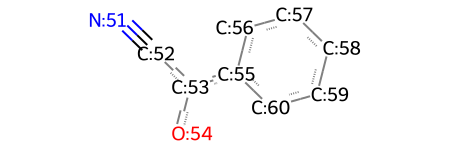

In [95]:
substrate_mol

In [81]:
rootedAtAtom = 5
radius = 1

substrate_mol = Chem.MolFromSmarts('[N:51]#[C:52][C@&H1:53]([O&H1:54])[c:55]1[c&H1:56][c&H1:57][c&H1:58][c&H1:59][c&H1:60]1')

for atom in substrate_mol.GetAtoms():
    env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, rootedAtAtom = 9)

# Create a sub-molecule from the environment
submol = Chem.PathToSubmol(mol, list(env))
template = Chem.MolToSmarts(submol)

In [85]:
template

'[c&H1:8][c&H1:9][c:4]'

In [49]:
substruct_mol = Chem.MolFromSmarts(template)
for atom in mol.GetAtoms():
    atom_idx = atom.GetIdx()
    atom.SetAtomMapNum(atom_idx) 

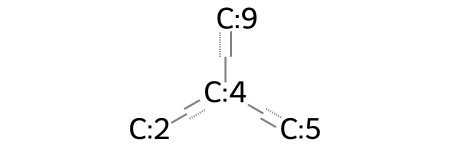

In [50]:
substruct_mol

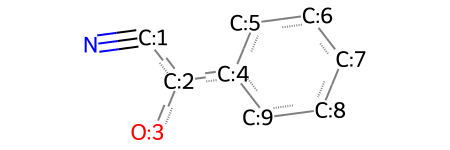

In [51]:
substrate_mol

In [59]:
mol2 = Chem.MolFromSmiles(Chem.MolToSmiles(substruct_mol))

[22:44:13] non-ring atom 1 marked aromatic


In [60]:
mol1 = Chem.MolFromSmiles(Chem.MolToSmiles(substrate_mol))

In [61]:
mol2

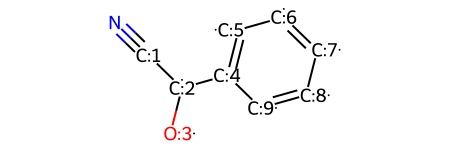

In [62]:
mol1

In [64]:
mol1.GetSubstructMatches(mol2)

ArgumentError: Python argument types in
    Mol.GetSubstructMatches(Mol, NoneType)
did not match C++ signature:
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, RDKit::SubstructMatchParameters params)
    GetSubstructMatches(RDKit::ROMol self, RDKit::MolBundle query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)
    GetSubstructMatches(RDKit::ROMol self, RDKit::ROMol query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)

In [52]:
substrate_mol.GetSubstructMatches(substruct_mol)

()

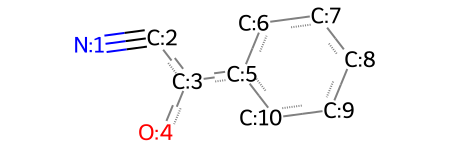

In [53]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1')

In [54]:
from rdkit.Chem import rdDepictor

In [55]:
draw.highlight_substructures_in_notebook('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1',
                                   '[c:5]([C@&H1:3])([c&H1:6])[c&H1:10]')

[22:42:38] SMILES Parse Error: syntax error while parsing: [N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1
[22:42:38] SMILES Parse Error: Failed parsing SMILES '[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1' for input: '[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1'


AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'

In [56]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1').GetSubstructMatches(Chem.MolFromSmarts('[c:5]([C@&H1:3])([c&H1:6])[c&H1:10]'))

[22:42:38] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 289 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-10.9-x86_64-cpython-312/rdkit/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
****



RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 289 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2024.03.6
	BOOST: 1_85
